In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import interpolate
from scipy import integrate
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import sqrt
from math import pi
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
from scipy import optimize
from labellines import labelLine, labelLines
import csv

In [5]:
#Import show() function for plotting 
%run C:\Users\wbenn/Marshak_Wave_Scripts/Marshak_3T/SelfSimilar_main/show.ipynb
#Import initial conditions
%run C:\Users\wbenn/Marshak_Wave_Scripts/Marshak_3T/SelfSimilar_main/initial_conditions.ipynb

## ODE'S to solve:
### Time transform :
$$[1]\qquad -\xi \frac{dT_e}{d\xi} = \frac{d^2 T_e^{n+4}}{d\xi^2} +  \frac{\gamma_0}{C_{\mathrm{ve}}}T_{\mathrm{e}}^{-m} (T_i-T_e)$$
$$[2] \qquad-\xi \frac{dT_i}{d\xi} = -\frac{\gamma_0}{ C_{\mathrm{vi}}} T_{\mathrm{e}}^{-m}(T_i-T_e)$$
### Space transform: 

$$[3] \qquad -\xi \frac{dT_e}{d\xi} = \frac{d^2 T_e^{n+4}}{d\xi^2} +\frac{\gamma_0}{ C_{\mathrm{ve}}\xi^2} T_{\mathrm{e}}^{-m} (T_i-T_e) $$
$$[4] -\xi \frac{dT_i}{d\xi} = -\frac{\gamma_0}{ C_{\mathrm{vi}} \xi^2} T_{\mathrm{e}}^{-m}(T_i-T_e)$$
### Derive 1st order ODE for [1]:
\begin{equation}
    -\xi \frac{dT_e}{d\xi} = \frac{d^2 T_e^{n+4}}{d\xi^2} +  \frac{\gamma_0}{C_{\mathrm{ve}}}T_{\mathrm{e}}^{-m} (T_i-T_e)
\end{equation}
Define a new function u:
$$u(\xi) = T'_e(\xi)  $$
$$\frac{d^2 T_e^{n+4}}{d \xi} = (n+4) T_e(\xi)^{n+2} \left((n+3) u^2+T_e(\xi) u'(\xi)\right)$$

[1] becomes:
\begin{equation}
    -\xi u = (n+4) T_e(\xi)^{n+2} \left((n+3) u^2+T_e(\xi) u'(\xi)\right) +  \frac{\gamma_0}{C_{\mathrm{ve}}}T_{\mathrm{e}}^{-m}(T_i-T_e)
\end{equation}
Solving for u':

\begin{equation}
     \frac{-\xi u -  \frac{\gamma_0}{C_{\mathrm{ve}}}T_{\mathrm{e}}^{-m}(T_i-T_e)}{(n+4)T_e^{n+2}}-(n+3)u^2 = T_e(\xi)u'(\xi)
\end{equation}
Simplifying:
\begin{equation}
    u' = -\frac{\frac{\xi u +  \frac{\gamma_0}{C_{\mathrm{ve}}}T_{\mathrm{e}}^{-m}(Ti-T_e)T_e^{-n} }{n+4} + (n+3)u^2T_e^2}{T_e^3}
\end{equation}
### Derive 1st order ODE for [3]:
\begin{equation}
    -\xi \frac{dT_e}{d\xi} = \frac{d^2 T_e^{n+4}}{d\xi^2} +\frac{\gamma_0}{ C_{\mathrm{ve}}\xi^2} T_{\mathrm{e}}^{-m} (T_i-T_e)
\end{equation}
Define $ u' = T_e'$
\begin{equation}
    -\xi u(\xi) = (n+4) T_e(\xi)^{n+2} \left((n+3) u^2(\xi)+T_e(\xi) u'(\xi)\right) + \frac{\gamma_0}{ C_{\mathrm{ve}}\xi^2} T_{\mathrm{e}}^{-m}\left(T_i(\xi)-T_e(\xi)\right)
\end{equation}
Solving for u'
\begin{equation}
    \frac{-\xi u(\xi)- \frac{\gamma_0}{ C_{\mathrm{ve}}\xi^2} T_{\mathrm{e}}^{-m}(T_i(\xi)-T_e(\xi))}{(n+4)T_e(\xi)^{n+2}} - (n+3)u^2(\xi) = T_e(\xi) u'(\xi) 
\end{equation}
\begin{equation}
    u'(\xi)= \frac{-\xi u(\xi)Te^{-n} - \frac{\gamma_0}{C_{\mathrm{ve}}\xi^2}Te^{-(n+m)}\left(Ti-Te\right)-(n+3)(n+4)Te^2u^2}       {Ti^3(n+4)}
\end{equation}
### Initial Conditions
### IC for Te for the space and time transforms
\begin{equation}
    T_e(\xi) = \bigg{(}\frac{(n+3)}{(n+4)}\xi_{\mathrm{max}}({\xi_{\mathrm{max}}}-\xi)\bigg{)}^{-(n+3)}
\end{equation}
### Derivative of Te 
\begin{equation}
    \frac{dT_e}{d\xi} = -\bigg{(}\frac{(n+3)}{(n+4)}\xi_{\mathrm{max}}\bigg{)}^{1/(n+3)}\bigg{(}\frac{(\xi_{\mathrm{max}}-\xi)}{n+3}\bigg{)}^{(2-n)/(n+3)}
\end{equation}
### Ti initial conditions for time transform 
\begin{equation}
T^{(1)}_i(\xi)= \frac{\gamma_0}{\mathrm{Cv_i}}\frac{(n+3)}{(n+4)}\frac{(\xi_{\mathrm{max}}-\xi_{\mathrm{max}})}{\xi_{\mathrm{max}}}T_e^{(1)}(\xi).
\end{equation}
### Ti initial conditions for space transform
\begin{equation}
\begin{split}
Ti^{(1)}=\frac{4\frac{\gamma_0}{\mathrm{C_vi}}(n+3)(-\xi_{\mathrm{max}}+\xi)Te^{(1)}}{(n+4)(2\frac{\gamma_0}{\mathrm{C_vi}}\xi^2-\xi^3-4\frac{\gamma_0}{\mathrm{C_vi}}\xi\xi_{\mathrm{max}}-\xi^2\xi_{\mathrm{max}}+2\frac{\gamma_0}{\mathrm{C_vi}}\xi_{\mathrm{max}}^2-\xi\xi_{\mathrm{max}}-\xi_{\mathrm{max}}^3)}.
\end{split}
\end{equation}

### Definitions of Parameters and variables
$ \xi = A \frac{x}{\sqrt{t}}, \qquad A^2 = \frac{1}{2\alpha}, \qquad \alpha = \frac{ac}{3} \frac{4}{n+4} \frac{T_0^{-n}}{\kappa_0 C_{\mathrm{ve}}}, \qquad  \gamma(x,t,T_{\mathrm{e}}) = \gamma_0 T_{\mathrm{e}}^{-m} f(x,t), \qquad m=0, 3/2$

### Test Problem Parameters
$C_{ve} = 0.1 [GJcm^{-3}keV^{-1}], \qquad C_{vi} = 0.05 [GJcm^{-3}keV^{-1}], \qquad \gamma_0 = [cm^3keV-ns], \qquad \rho = 3.0 [gcm^{-3}], \qquad a = 0.01372 [GJKeV^{-4} cm^{-3}], \qquad  c = 29.9792458 [cm ns^{-1}], \qquad n = 3$

### Define constants

In [6]:
n = 3
T0=1
c=29.998
a=0.01372
kappa0=100
xmax=1.2
rho = 3.0
Cve=0.1*rho
Cvi=.05*rho
#alpha2= a*c*4*T0**(-n)/(3*(n+4)*kappa0*Cve)
alpha= a*c*4/(3*(n+4)*kappa0*Cve*(T0**n)*rho)

A = sqrt(1/(2*alpha))
tol = 1e-12
m=0
gamma0=0.5
ICt = [g(xmax-tol,xmax),gprime(xmax-tol,xmax), h(xmax-tol,xmax)]
ICs = [g(xmax-tol,xmax),gprime(xmax-tol,xmax), f(xmax-tol,xmax)]
print(alpha)
step=1e-4

print(alpha)

0.0008710530370370367
0.0008710530370370367


### Optimize functions to find ximax

In [7]:
#Time dependent optimize functions
#using BDF to solve time dependent eqs 1,2
opt_fun_BDF_time = lambda xm: integrate.solve_ivp(RHSfun_time, (xm-tol,1e-10), [g(xm-tol,xm),gprime(xm-tol,xm), h(xm-tol,xm)], 
                                         method='BDF', max_step = step).y[0][-1] - 1
#Using DOP853 to solve time dependent
opt_fun_DOP_time = lambda xm: integrate.solve_ivp(RHSfun_time, (xm-tol,0), [g(xm-tol,xm),gprime(xm-tol,xm), h(xm-tol,xm)], 
                                         method='DOP853', max_step = step).y[0][-1] - 1
#Space dependent(BDF) eqs 2,3
opt_fun_BDF_space = lambda xm: integrate.solve_ivp(RHSfun_space, (xm-tol,1e-10), [g(xm-tol,xm),gprime(xm-tol,xm), f(xm-tol,xm)], 
                                         method='BDF', max_step = step).y[0][-1] - 1

### Output results for numerical code verification

#### Time dependent case

0.9608120188394155


1.5

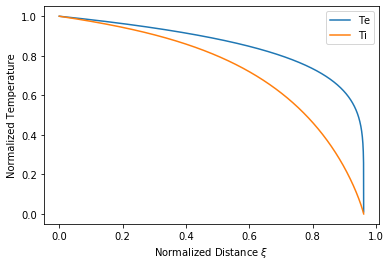

In [11]:
#Choose parameters
m=3/2
minval = optimize.brentq(opt_fun_BDF_time, .8,1.2)
print(minval)
sol = integrate.solve_ivp(RHSfun_time, (minval-tol,1e-14), ICs, method='BDF', max_step = step)

#choose initial and final times
# 1 shake = 10 ns
tau_i=1e-12
tau_1=1
tau_2=10
tau_3=20

z1=sqrt(tau_i)/A
z2=sqrt(tau_1)/A
z3 =sqrt(tau_2)/A
z4 = sqrt(tau_3)/A
ll = len(sol.t)

TeList=np.ndarray.tolist(sol.y[0])
TiList=np.ndarray.tolist(sol.y[2])

xlistI=np.ndarray.tolist(sol.t*z1)
xlist1=np.ndarray.tolist(sol.t*z2)
xlist2=np.ndarray.tolist(sol.t*z3)
xlist3=np.ndarray.tolist(sol.t*z4)

#plot solution
plt.plot(sol.t,sol.y[0],label="Te")
plt.plot(sol.t,sol.y[2],label = "Ti")
plt.xlabel(r"Normalized Distance $\xi$")
plt.ylabel("Normalized Temperature")
plt.legend()
# show("test")

# Write results to csv files 
#Initial condition
with open('g1e-12_m32_gamma0_half_time.csv', 'w', ) as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_NONE, lineterminator = '\n',escapechar='')
    
    fields = (["position (cm)", "Electron Temp (KeV)", "Ion Temp (KeV)"])
    for i in range(ll):
        wr.writerow([(xlistI[ll-1-i]),(TeList[ll-1-i]), (TiList[ll-1-i])])
#results        
with open('g1_m32_gamma0_half_time.csv', 'w', ) as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_NONE, lineterminator = '\n',escapechar='')
    
    fields = (["position (cm)", "Electron Temp (keV)", "Ion Temp (keV)"])
    for i in range(ll):
        wr.writerow([(xlist1[ll-1-i]),(TeList[ll-1-i]), (TiList[ll-1-i])])
with open('g10_m32_gamma0_half_time.csv', 'w', ) as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_NONE, lineterminator = '\n',escapechar='')
    
    fields = (["position (cm)", "Electron Temp (keV)", "Ion Temp (keV)"])
    for i in range(ll):
        wr.writerow([(xlist2[ll-1-i]),(TeList[ll-1-i]), (TiList[ll-1-i])])
with open('g20_m32_gamma0_half_time.csv', 'w', ) as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_NONE, lineterminator = '\n',escapechar='')
    
    fields = (["position (cm)", "Electron Temp (keV)", "Ion Temp (keV)"])
    for i in range(ll):
        wr.writerow([(xlist3[ll-1-i]),(TeList[ll-1-i]), (TiList[ll-1-i])])

In [9]:
### Check solution at x,t=0 
print(sol.y[0][-1],sol.t[-1])

1.0004139623298154 1e-14


#### Space Dependent case 


C:\Users\wbenn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


0.9479195968233898


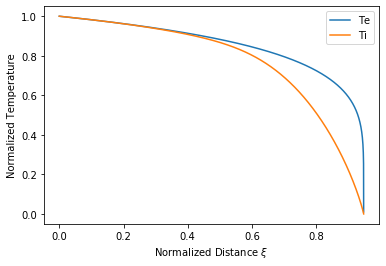

In [ ]:
#Choose parameters
m=3/2
minval = optimize.brentq(opt_fun_BDF_space, .8,1.2)
print(minval)
sol = integrate.solve_ivp(RHSfun_space, (minval-tol,1e-12), ICs, method='BDF', max_step = 1e-4)

#choose initial and final times
# 1 shake = 10 ns
tau_i=1e-12
tau_1=1
tau_2=10
tau_3=20

z1=sqrt(tau_i)/A
z2=sqrt(tau_1)/A
z3 =sqrt(tau_2)/A
z4 = sqrt(tau_3)/A
ll = len(sol.t)

TeList=np.ndarray.tolist(sol.y[0])
TiList=np.ndarray.tolist(sol.y[2])

xlistI=np.ndarray.tolist(sol.t*z1)
xlist1=np.ndarray.tolist(sol.t*z2)
xlist2=np.ndarray.tolist(sol.t*z3)
xlist3=np.ndarray.tolist(sol.t*z4)

#plot solution
plt.plot(sol.t,sol.y[0],label="Te")
plt.plot(sol.t,sol.y[2],label = "Ti")
plt.xlabel(r"Normalized Distance $\xi$")
plt.ylabel("Normalized Temperature")
plt.legend()
# show("test")

# Write results to csv files 
#Initial condition
with open('g1e-12_m32_gamma0_half_space.csv', 'w', ) as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_NONE, lineterminator = '\n',escapechar='')
    
    fields = (["position (cm)", "Electron Temp (KeV)", "Ion Temp (KeV)"])
    for i in range(ll):
        wr.writerow([(xlistI[ll-1-i]),(TeList[ll-1-i]), (TiList[ll-1-i])])
#results        
with open('g1_m32_gamma0_half_space.csv', 'w', ) as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_NONE, lineterminator = '\n',escapechar='')
    
    fields = (["position (cm)", "Electron Temp (KeV)", "Ion Temp (KeV)"])
    for i in range(ll):
        wr.writerow([(xlist1[ll-1-i]),(TeList[ll-1-i]), (TiList[ll-1-i])])
with open('g10_m32_gamma0_half_space.csv', 'w', ) as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_NONE, lineterminator = '\n',escapechar='')
    
    fields = (["position (cm)", "Electron Temp (KeV)", "Ion Temp (KeV)"])
    for i in range(ll):
        wr.writerow([(xlist2[ll-1-i]),(TeList[ll-1-i]), (TiList[ll-1-i])])
with open('g20_m32_gamma0_half_space.csv', 'w', ) as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_NONE, lineterminator = '\n',escapechar='')
    
    fields = (["position (cm)", "Electron Temp (KeV)", "Ion Temp (KeV)"])
    for i in range(ll):
        wr.writerow([(xlist3[ll-1-i]),(TeList[ll-1-i]), (TiList[ll-1-i])])